## Makes plots and CSV files based on the [*LA City Open Data*](https://data.lacity.org/) Calls for Service data


#### THIS SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.


In [160]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [161]:
df19 = pd.read_csv('../data/cfs_2019.csv')
df20 = pd.read_csv('../data/cfs_2020.csv')

In [162]:
df19.head()

,Incident_Number,Area_Occ,Rpt_Dist,Dispatch_Date,Dispatch_Time,Call_Type_Code,Call_Type_Text
0,LPD190704000047,N Hollywood,1532.0,07/04/2019 12:00:00 AM,00:14:49,507F,FIREWORKS
1,LPD190529006334,Outside,NaN,05/29/2019 12:00:00 AM,21:28:53,006,CODE 6
2,LPD190218001024,Southwest,379.0,02/18/2019 12:00:00 AM,07:46:54,507C,CONSTRUCTION
3,PD19120600001346,Northeast,1109.0,12/06/2019 12:00:00 AM,08:32:27,006,CODE 6
4,LPD190216004881,Van Nuys,933.0,02/16/2019 12:00:00 AM,21:14:49,507P,PARTY


## Let's set the Dispatch_Date column to date format

In [163]:
df19.Dispatch_Date = pd.to_datetime(df19.Dispatch_Date, infer_datetime_format=True)
df20.Dispatch_Date = pd.to_datetime(df20.Dispatch_Date, infer_datetime_format=True)


## Check the dispatch date of August, in both 2019 and 2020

In [164]:
df19_ = df19[(df19.Dispatch_Date >= '2019-01-01') & (df19.Dispatch_Date < '2020-01-01')]
df20_ = df20[(df20.Dispatch_Date >= '2020-01-01') & (df20.Dispatch_Date <= '2020-10-01')]
# Preview the 2020 data, top five rows by default
df20_.head()

,Incident_Number,Area_Occ,Rpt_Dist,Dispatch_Date,Dispatch_Time,Call_Type_Code,Call_Type_Text
0,PD20012600002716,Rampart,245.0,2020-01-26,14:37:04,211S,SUSP
1,PD20011400005678,Outside,NaN,2020-01-14,23:26:20,006,CODE 6
2,PD20011100005314,Outside,NaN,2020-01-11,23:32:40,006,CODE 6
3,PD20010100005220,Southwest,328.0,2020-01-01,22:34:29,245SN,SUSP NOW
4,PD20010500000660,Hollywood,636.0,2020-01-05,04:04:42,907PA2,POSS AMB O/D


## Some data wrangling
## Then count by day

In [165]:
# First copy slice as a dataframe
df20_= df20_.copy()
df19_= df19_.copy()
# Then do a count
df20_['month'] = df20_['Dispatch_Date'].dt.strftime('%b')
df19_['month'] = df19_['Dispatch_Date'].dt.strftime('%b')
# Let's make sure the months
# are in the calendar order
import calendar
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

df20_['count']=df20_.groupby(by='Dispatch_Date')['Dispatch_Date'].transform('count')
df19_['count']=df19_.groupby(by='Dispatch_Date')['Dispatch_Date'].transform('count')
df19_['month'] = pd.Categorical(df19_['month'], categories=months, ordered=True)
df20_['month'] = pd.Categorical(df20_['month'], categories=months, ordered=True)
# Preview 2019
df19_.head()

,Incident_Number,Area_Occ,Rpt_Dist,Dispatch_Date,Dispatch_Time,Call_Type_Code,Call_Type_Text,month,count
0,LPD190704000047,N Hollywood,1532.0,2019-07-04,00:14:49,507F,FIREWORKS,Jul,6907
1,LPD190529006334,Outside,NaN,2019-05-29,21:28:53,006,CODE 6,May,5981
2,LPD190218001024,Southwest,379.0,2019-02-18,07:46:54,507C,CONSTRUCTION,Feb,4595
3,PD19120600001346,Northeast,1109.0,2019-12-06,08:32:27,006,CODE 6,Dec,4623
4,LPD190216004881,Van Nuys,933.0,2019-02-16,21:14:49,507P,PARTY,Feb,4763


## Create a line plot, comparing two years

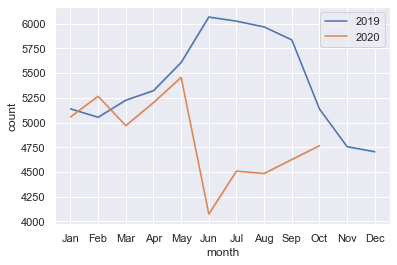

<Figure size 864x864 with 0 Axes>

In [168]:
# Some boilerplate to initialize things
sns.set()
plt.figure()

#Define plots
d2019 = sns.lineplot(data=df19_, x="month", y="count", label = "2019")
d2020  = sns.lineplot(data=df20_, x="month", y="count", label = "2020")
plt.figure(figsize=(12,12))
plt.show()

## Further work could involve comparing by crime types